In [80]:
import cv2
import numpy as np
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
import matplotlib.pyplot as plt
img = cv2.imread('leaf.jpeg')
org_msk_img = cv2.imread('mask0.jpeg')
org_msk_img = cv2.cvtColor(org_msk_img, cv2.COLOR_BGR2GRAY)
#img = cv2.imread('nv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
filtro = cv2.pyrMeanShiftFiltering(img, 20, 40)
gray = cv2.cvtColor(filtro, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

In [81]:
contornos, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
buracos = []
for con in contornos:
  area = cv2.contourArea(con)
  if area < 1000:
    buracos.append(con)
cv2.drawContours(thresh, buracos, -1, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [82]:
dist = ndi.distance_transform_edt(thresh)
dist_visual = dist.copy()

In [83]:
local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)

markers = ndi.label(local_max, structure=np.ones((3, 3)))[0]

labels = watershed(-dist, markers, mask=thresh)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17556\4049458430.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)


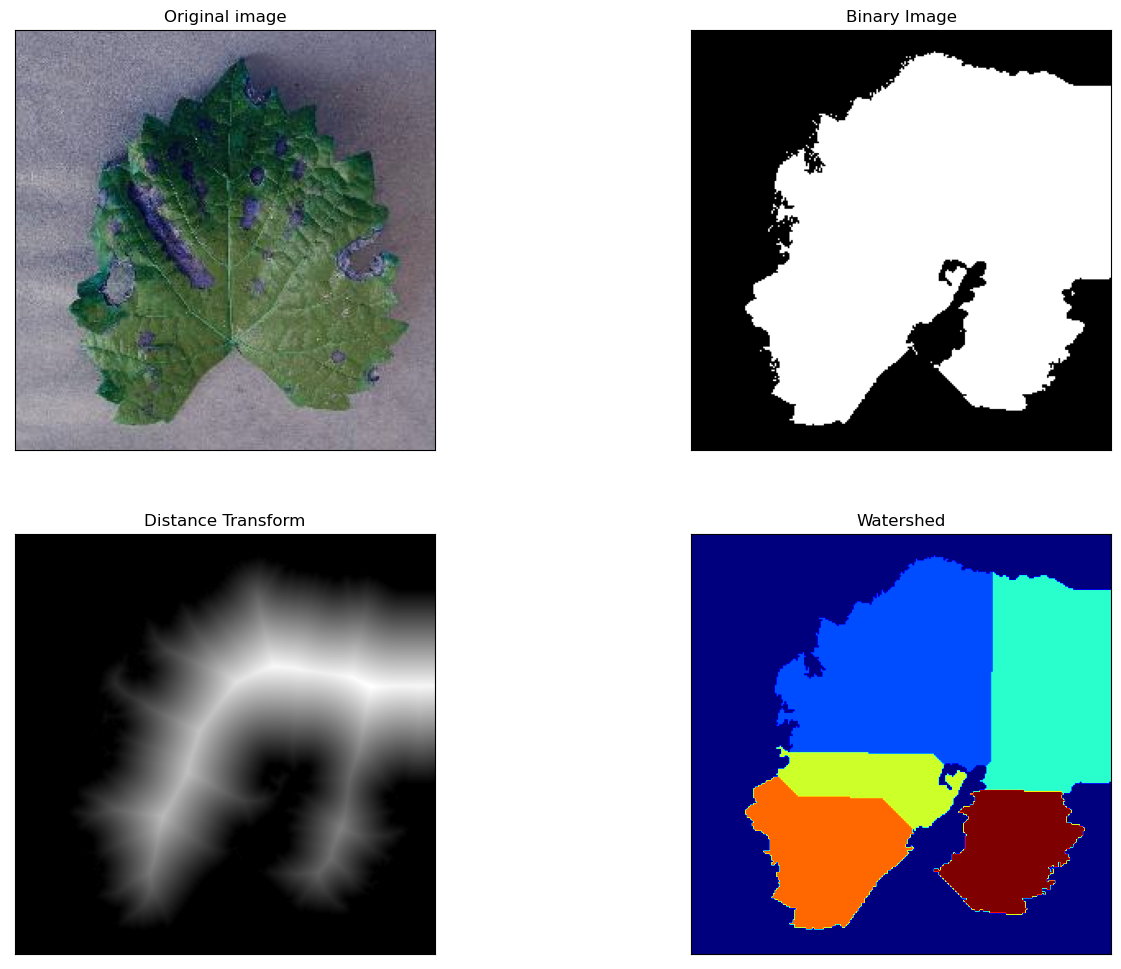

In [84]:
titulos = ['Original image', 'Binary Image', 'Distance Transform', 'Watershed']
imagens = [img, thresh, dist_visual, labels]
fig = plt.gcf()
fig.set_size_inches(16, 12)  
for i in range(4):
    plt.subplot(2,2,i+1)
    if (i == 3):
      cmap = "jet"
    else:
       cmap = "gray"
    plt.imshow(imagens[i], cmap)
    plt.title(titulos[i]) 
    plt.xticks([]),plt.yticks([])     
plt.show()

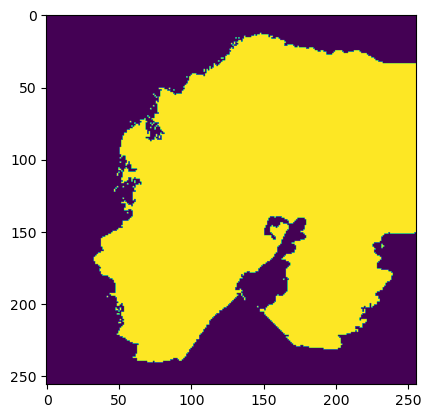

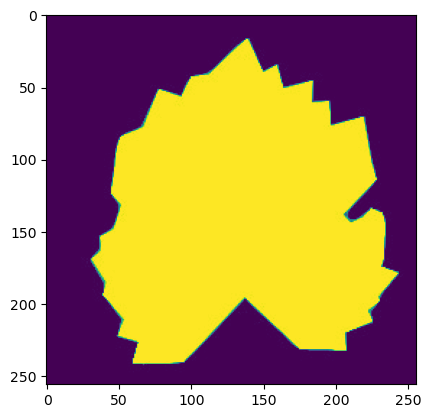

In [85]:
def print_IOU(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    union = 0
    intersection = 0

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 or seg_mask_img[i][j]!=0 :
                union+=1
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0:
                intersection += 1
    
    iou = intersection/union

    print("IOU for image is ", iou)
    



plt.imshow(thresh)
plt.show()
plt.imshow(org_msk_img)
plt.show()

In [86]:
def print_f1_score(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    overlap = 0

    pixel_1 = 0
    pixel_2 = 0

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0 :
                overlap+=1
            if org_mask_img[i][j]!=0 :
                pixel_1 += 1
            if seg_mask_img[i][j]!=0:
                pixel_2 += 1
    
    f1 = 2*(overlap)/(pixel_2 + pixel_1)

    print("F1 score for image is ", f1)
    

print_f1_score(thresh,org_msk_img)

F1 score for image is  0.8507935580896202


In [87]:
def print_pixel_accuracy(seg_mask_img, org_mask_img):
    h,w = seg_mask_img.shape
    correct_pixel = 0
    total_pixel = h*w

    for i in range(0, h):
        for j in range(0,w):
            if org_mask_img[i][j]!=0 and seg_mask_img[i][j]!=0:
                correct_pixel += 1
            if org_mask_img[i][j]==0 and seg_mask_img[i][j]==0:
                correct_pixel += 1
    
    accuracy = correct_pixel / total_pixel

    print("Pixel Accuracy for image  is ", accuracy)
    

print_pixel_accuracy(thresh, org_msk_img)
print_f1_score(thresh,org_msk_img)
print_IOU(thresh,org_msk_img)

Pixel Accuracy for image  is  0.8440704345703125
F1 score for image is  0.8507935580896202
IOU for image is  0.7403313513238807
